# 2016 Election Prediction

### Completed by Nighat Ansari

    Using given data about voting states, this model uses margins to predict the likelihoods of certain outcomes  
    in the 2016 election. 

    I made extensive uses of dictionaries, statisttics, and machine learning principles in creating this model.


### About

This model is a simplified 2016 US Election Forecast. Candidates Donald Trump and Hillary Clinton ran against each other and the data given contained information about how each of the 50 states voted in electoral college and popular vote. This model also uses different types of mathematical biases to predict chances of winning for each candidate. In the last portion, margins of victory are calculated using electoral college and popular votes and through 20,000 simulations, the model predicts the chances of a:

1. **Trump Victory:** if Trump wins the electoral college. 
2. **Obama Zone:** if Clinton wins the electoral college and the margin of the popular vote win is less than 3.5%.
3. **Narrow Clinton Win:** if Clinton wins the electoral college and the margin of the popular vote win is greater than 3.5% but less than 7.5%.
4. **Clinton Blowout:** if Clinton wins the electoral college and the margin of the popular vote win is greater than or equal to 7.5%.


### Importing
Importing these modules will allow the notebook to graph, use dictionaries, and leevrage statistics functions (built into Python) like norm. We also import an election_data.py file which contains the data from all 50 states and how they voted.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np

from scipy.stats import norm
from collections import defaultdict, Counter

from election_data import mean_std, results2016

### Election Data

1. results2016 is a dictionary containing the popular vote percentages, electoral votes, and total votes across the 50 states. The states are keys with dictionaries of this information mapped to them.

Uncomment the print statement below to see what results2016 looks like.

2. mean_std is dictionary of tuples containing the mean and standard deviation of **Trump's votes** mapped to each state.

Uncomment the print statement below to see what mean_std looks like.

In [12]:
#print(results2016)
#print(mean_std)

### Prediction 1
No bias added.

In [3]:
clinton = []
counter1 = 0
for i in range(0,10000):

    trump_votes = 0
    hillary_votes = 0
    for key in mean_std:
        if key in ["Nebraska 1st District", "Nebraska 2nd District", "Nebraska 3rd District","Maine 1st District", 
                   "Maine 2nd District"]:
            continue
        elif key == "Nebraska - statewide":
            x = "Nebraska"
        elif key == "Maine - statewide":
            x = "Maine"
        else:
            x = key
        if norm.rvs(mean_std[key][0],mean_std[key][1]) > 0.5:
            trump_votes = trump_votes + (results2016[x]['electoral_votes'])
        else:
            hillary_votes = hillary_votes + (results2016[x]['electoral_votes'])
    
    if hillary_votes >= 270:
        counter1 += 1
h_win = counter1/10000
t_win = 1 - h_win
print("Chances Trump will win: " + str(t_win * 100) + "%")
print("Chances Clinton will win: " + str(h_win * 100) + "%") 


Chances Trump will win: 12.050000000000004%
Chances Clinton will win: 87.94999999999999%


### Prediction 2
With a bias added.

In [14]:
from election_data import mean_std, results2016
from scipy.stats import norm

clinton2 = []
counter2 = 0
for i in range(0,10000):
    
    trump_votes2 = 0
    hillary_votes2 = 0
    #overall bias
    bias = norm.rvs(0,.016)
    
    
    for key in mean_std:
        if key in ["Nebraska 1st District", "Nebraska 2nd District", "Nebraska 3rd District","Maine 1st District", 
                   "Maine 2nd District"]:
            continue
        elif key == "Nebraska - statewide":
            x = "Nebraska"
        elif key == "Maine - statewide":
            x = "Maine"
        else:
            x = key
        
        if (norm.rvs(mean_std[key][0],mean_std[key][1]) + bias) > 0.5:
            trump_votes2 = trump_votes2 + (results2016[x]['electoral_votes'])
        else:
            hillary_votes2 = hillary_votes2 + (results2016[x]['electoral_votes'])
    
    if hillary_votes2 >= 270:
        counter2 += 1

        
h_win2 = counter2/10000
t_win2 = 1 - h_win2

print("Chances Trump will win: " + str(t_win2 * 100) + "%")
print("Chances Clinton will win: " + str(h_win2 * 100) + "%") 


Chances Trump will win: 27.139999999999997%
Chances Clinton will win: 72.86%


### Prediction 3
With an overall bias added.

In [15]:
trumpp3 = []


for i in range(0,10000):
    bias2 = norm.rvs(.01,.002)
    trump_votes3 = 0
    hillary_votes3 = 0
   
    for key in mean_std:
        
        x2 = norm.rvs(mean_std[key][0],mean_std[key][1])
        if key in ["Nebraska 1st District", "Nebraska 2nd District", "Nebraska 3rd District","Maine 1st District", "Maine 2nd District"]:
            continue
        if key == "Nebraska - statewide":
            x = "Nebraska"
        elif key == "Maine - statewide":
            x = "Maine"
        else:
            x = key
        if x2 + bias2 > 0.5:
            trump_votes3 = trump_votes3 + results2016[x]['electoral_votes']
        else:
            hillary_votes3 = hillary_votes3 + results2016[x]['electoral_votes']

    if trump_votes3 >= 270:
        trumpp3.append("Trump")
        
t_win3 = len(trumpp3)/10000
h_win3 = 1 - t_win3

print("With overall bias added: ")
print("Chances Trump will win: " + str(t_win3 * 100) + "%")
print("Chances Clinton will win: " + str(h_win3 * 100) + "%") 


With overall bias added: 
Chances Trump will win: 43.14%
Chances Clinton will win: 56.86%


### Prediction Visualization

This visual is split into 4 zones determined by margins of winning. Once again, the "zones" are:

1. **Trump Victory:** if Trump wins the electoral college. 
2. **Obama Zone:** if Clinton wins the electoral college and the margin of the popular vote win is less than 3.5%.
3. **Narrow Clinton Win:** if Clinton wins the electoral college and the margin of the popular vote win is greater than 3.5% but less than 7.5%.
4. **Clinton Blowout:** if Clinton wins the electoral college and the margin of the popular vote win is greater than or equal to 7.5%.

To determine whether Trump or Clinton won the electoral college votes, one must have greater than or equal to 270 votes. I used popular votes to calculate margins for both candidates. Using margins or differences in popular votes for the candidates, I determined how the visual's zones will be split and where they will overlap.

Clinton Blowout: 12.005%
Obama Zone: 37.61%
Narrow Clinton Win: 22.78%
Trump win: 27.605%


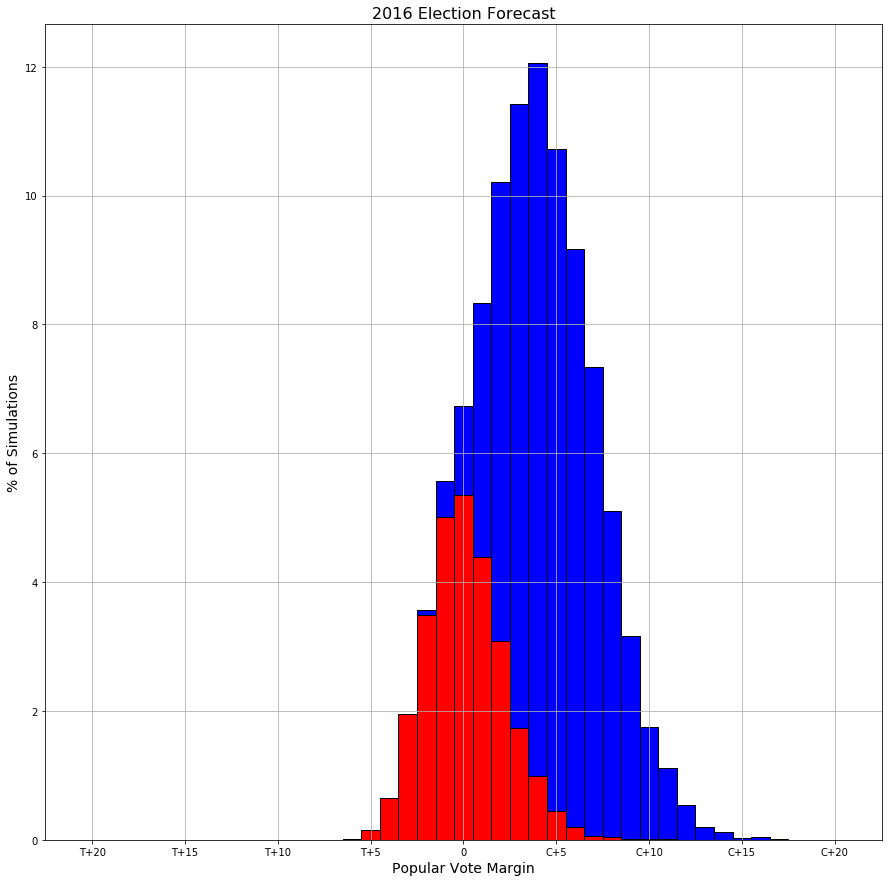

In [16]:

c_margins = {}
t_margins = {}
c_1 = []
c_2 = []
c_3 = []
t_win = []

for i in range(0,20000):
    t_popular = 0
    h_popular = 0
    trump_elec = 0
    hillary_elec = 0
    total_vote = 0
    
    bias5 = norm.rvs(0,.016)
    
    for key in mean_std:
        prob = norm.rvs(mean_std[key][0], mean_std[key][1]) + bias5
        if key in ["Nebraska 1st District", "Nebraska 2nd District", "Nebraska 3rd District","Maine 1st District", "Maine 2nd District"]:
            continue
        if key == "Nebraska - statewide":
            x = "Nebraska"
        elif key == "Maine - statewide":
            x = "Maine"
        else:
            x = key
            
        t_popular = t_popular + (prob * (results2016[x]['vote_total']))  
        h_popular = h_popular + ((1 - prob) * (results2016[x]['vote_total']))
        total_vote = total_vote + results2016[x]['vote_total']   
        
        if prob > 0.5:
            trump_elec = trump_elec + (results2016[x]['electoral_votes'])
        else:
            hillary_elec = hillary_elec + (results2016[x]['electoral_votes'])
    
    if hillary_elec >= 270:
        c_margin = ((h_popular - t_popular)/total_vote) * 100
        cmargin = round(((h_popular - t_popular)/total_vote) * 100)
        if cmargin in c_margins:
            c_margins[cmargin] = c_margins.get(cmargin) + 1
        else:
            c_margins[cmargin] = 1 
        
        if cmargin >= 7.5:
            c_1.append(cmargin)
        elif cmargin >= 3.5 and cmargin < 7.5:
            c_2.append(cmargin)
        elif cmargin < 3.5:
            c_3.append(cmargin)
            
    else:
        t_margin = ((t_popular - h_popular)/total_vote) * 100
        tmargin = round(((t_popular - h_popular)/total_vote) * 100)

        if tmargin in t_margins:
            t_margins[tmargin] = t_margins.get(tmargin) + 1           
        else:
            t_margins[tmargin] = 1 
        t_win.append(tmargin)
        
        
print("Clinton Blowout: " + str((len(c_1)/20000) * 100) + "%")
print("Obama Zone: " + str((len(c_2)/20000) * 100) + "%")
print("Narrow Clinton Win: " + str((len(c_3)/20000) * 100) + "%")
print("Trump win: " + str((len(t_win)/20000) * 100) + "%")

plt.figure(figsize=(15,15))


barWidth = 1  

    
y_vals1 = []
x_vals1 = []
for x in np.arange(-20.0,21.0, 1.0):
    if c_margins.get(x) == None:
        c_margins[x] = 0
    if t_margins.get(x) == None:
        t_margins[x] = 0


for key in sorted(c_margins):
    y_vals1.append((c_margins[key]/20000) * 100)
    x_vals1.append(key)

    
x_vals2 = []
y_vals2 = []

for key in sorted(t_margins):
    y_vals2.append((t_margins[key]/20000) * 100)
    x_vals2.append(key)  


plt.title("2016 Election Forecast", fontsize=16)
plt.xlabel("Popular Vote Margin", fontsize=14)
plt.ylabel("% of Simulations", fontsize=14)
plt.xticks([val for val in range(-20,21,5)], ["T+20", "T+15", "T+10", "T+5", "0", "C+5", "C+10", "C+15", "C+20"])
    
plt.grid(axis='y')
plt.grid(axis = 'x')
plt.bar(x_vals1, y_vals1, bottom = y_vals2, width=barWidth, color='b', label='Rainfall', edgecolor = 'k');
plt.bar(x_vals2, y_vals2, width=barWidth, color='r', label='Rainfall', edgecolor = 'k'); 

